In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Life Expectancy Data.csv')
print(data.shape)
data.head()

(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


В описании признаков есть неточности, которые были обнаружены при сравнении с данными на сайте ВОЗ.   
При наличии таких неточностей это будет указано после каждого признака.   
__Country__ - страна.   
__Year__ - год.   
__Status__ - развитая или развивающаяся страна.   
__Life expectancy__ - продолжительность жизни.   
__Adult Mortality__ - показатель взрослой смертности обоих полов (вероятность смерти в возрасте от 15 до 60 лет на 1000 человек населения)   
*Не вероятность, а количество смертей, поделенных на 1000.   
__infant deaths__ - количество младенческих смертей на 1000 человек населения.   
*Не на 1000 человек населения, а поделенных на 1000.   
__Alcohol__ - потребление алкоголя на душу населения (15 лет и старше) (в литрах чистого алкоголя).   
__percentage expenditure__ - расходы на здравоохранение в процентах от валового внутреннего продукта на душу населения (%).   
*Не в процентах, а в долларах.   
__Hepatitis B__ - иммунизация против гепатита В (HepB) среди детей в возрасте до 1 года (%)   
__Measles__ - корь - число зарегистрированных случаев на 1000 человек населения.   
*Не на 1000 человек населения, а всего.   
__BMI__ - средний индекс массы тела всего населения.   
*Не средний индекс, а процент населения с избыточным весом (индекс массы тела > 25).   
__under-five deaths__ - число смертей в возрасте до пяти лет на 1000 человек населения.   
*Не на 1000 человек населения, а поделенных на 1000.   
__Polio__ - иммунизация против полиомиелита (Pol3) среди детей в возрасте до 1 года (%).   
__Total expenditure__ - государственные расходы на здравоохранение в процентах от общих государственных расходов (%).   
*Не от расходов, а от ВВП.   
__Diphtheria__ - иммунизация против дифтерии, столбняка и коклюша (АКДС-3) среди детей в возрасте до 1 года (%).   
__HIV/AIDS__ - число смертей на 1000 живорождений от ВИЧ/СПИДа (0-4 года).   
*Не на на 1000 живорождений, а поделенных на 1000.   
__GDP__ - валовой внутренний продукт на душу населения (в долларах).   
__Population__ - численность населения страны.   
__thinness 1-19 years__ - худоба среди детей и подростков в возрасте от 10 до 19 лет (%).   
*В названии признака должно быть "10-19".   
__thinness 5-9 years__ - Распространенность худобы среди детей в возрасте от 5 до 9 лет (%).   
__Income composition of resources__ - индекс человеческого развития с точки зрения структуры доходов и ресурсов (индекс варьируется от 0 до 1).   
__Schooling__ - количество лет обучения в школе (лет).   
*Скорее всего не только в школе, а количество лет во всех образовательных учреждениях.

In [5]:
dic = {}
for col in data.columns:
    dic[col] = col.strip().lower().replace(' ', '_')
dic[' thinness  1-19 years'] = 'thinness__10-19_years'
data = data.rename(columns=dic)

In [9]:
data.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


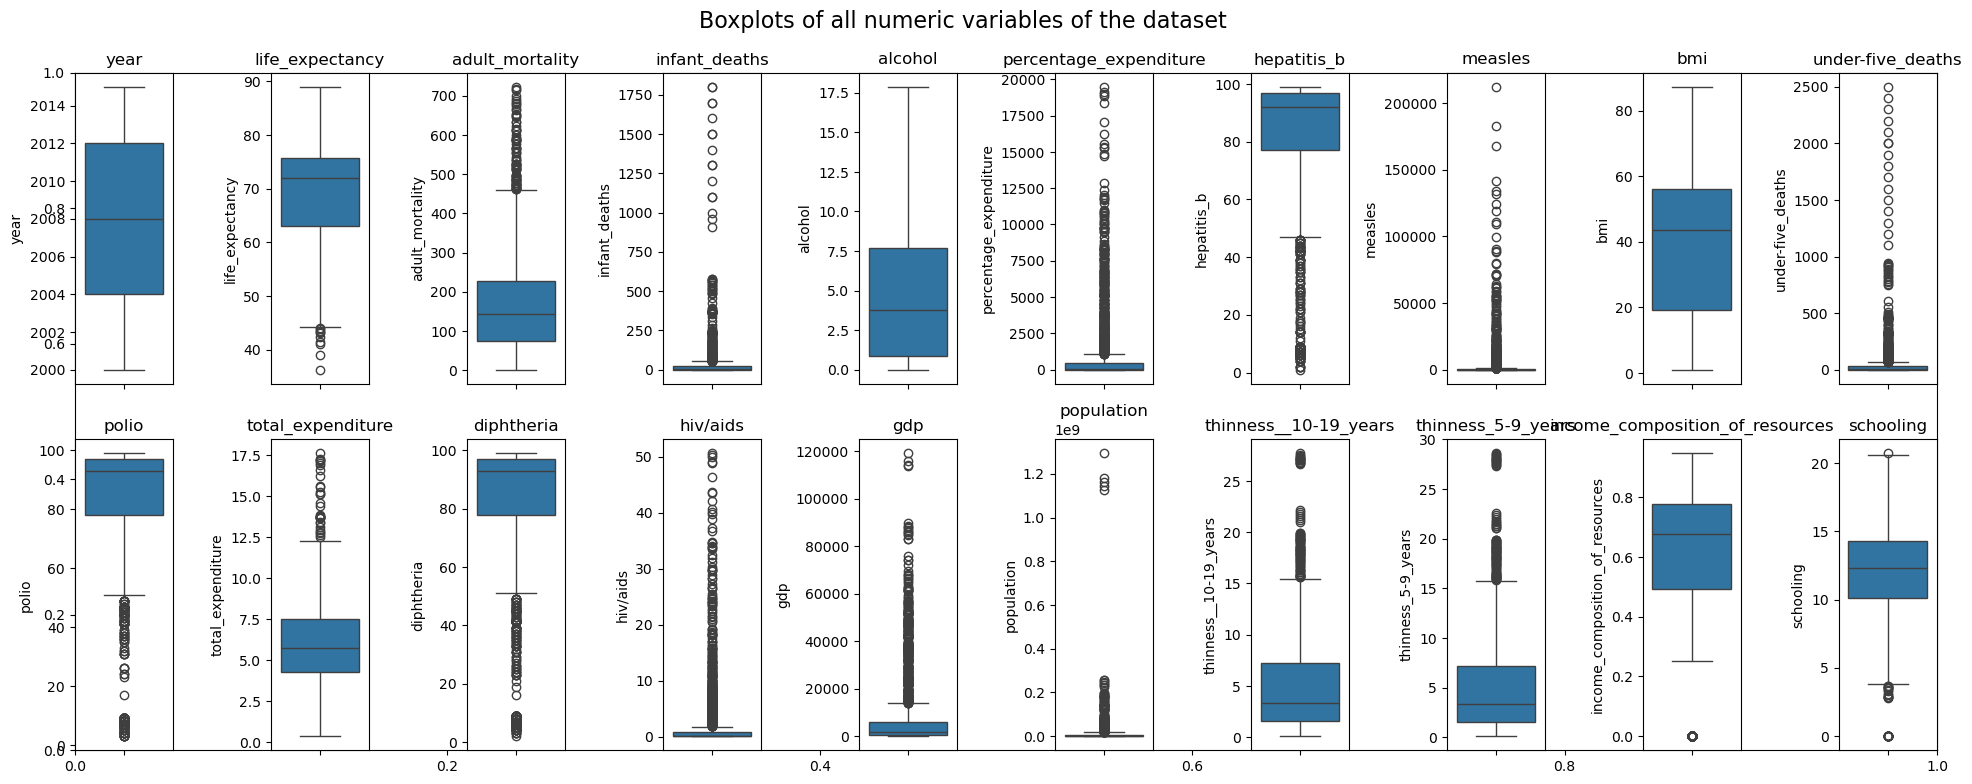

In [11]:
numeric_cols = data.dtypes[data.dtypes != "object"].index

plt.subplots(figsize=(20,8))
count=1
for i in numeric_cols:
    plt.subplot(2,10,count)
    sns.boxplot(data=data[i])
    plt.title(i, fontsize=12)
    count+=1
    
plt.suptitle('Boxplots of all numeric variables of the dataset', fontsize=16)
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show();

Уберем колонки __under-five deaths__ и __thinness_5-9_years__, поскольку они связаны с __infant_deaths__ и __thinness__1-19_years__ соответственно.   
Уберем страны, у которых больше половины пропущенных значений в одной или более колонках. Вместе с ними уберутся страны, у которых только одно наблюдение. У всех остальных будет по 16 наблюдений.

In [13]:
data = data.drop(['under-five_deaths', 'thinness_5-9_years'], axis=1)
count_value = data.groupby('country').agg('count')
drop_list = count_value[count_value < 8].dropna(how='all').index
data = data.drop(data[data['country'].isin(drop_list)].index)
data = data.reset_index(drop=True)

Кроме пропусков, во многих колонках значения искажены. Убедиться в этом можно, если сравнить эти значения с данными ВОЗ на сайте. Искажение происходит по определенной закономерности для каждой колонки, поэтому исправим значения в соответствии с данными ВОЗ. Для этого напишем две основные функции. Одна для проверки на искажение значений, другая для исправления значений.

In [17]:
def check_column(data, column, func='max', coef=3.5, fix=False):
    agg_value = data.groupby('country')[column].agg(func).reset_index() # для каждой страны найдем максимальное значение в указанной колонке
    agg_value[func+'_'+column] = agg_value[column]
    agg_value = agg_value.drop(column, axis=1)
    data = pd.merge(data, agg_value, on='country', how='left')
    if fix == False:
        data['coef_'+column] = data[func+'_'+column] / (data[column] + 0.01) # посчитаем во сколько раз каждое значение больше максимума
        return data[(data['coef_'+column] > coef)] # вернем значения, которые меньше максимума в 3.5 раза
    else:
        return data # или просто вернем все данные с колонкой максимума

In [19]:
def fix_col(x, col, fill_na=False, fill_zero=False, zero=True):
    if x['year'] == 2015:
        near_val = data.loc[x.name]['max_'+col] # определим максимальное значение в качестве ближайшего для 2015 года
    elif x['year'] != 2015:
        near_val = data.loc[x.name-1][col] # для остальных будем брать предыдущее значение в качестве ближайшего

    if fill_na == True: # для заполнения пропусков ближайшими значениями
        if np.isnan(x[col]):
            return near_val
        else:
            return x[col]

    if fill_zero == True: # для заполнения нулей ближайшими значениями
        if x[col] <= 0.01:
            return near_val
        else:
            return x[col]
        
    if zero == False: # для исправления искажений, где нужно умножение на 10
        if abs(x[col] - near_val) <= abs(x[col] * 10 - near_val): # вернем значение, у которого разность с ближайшим по модулю меньше
            return x[col]
        else:
            return x[col] * 10

    if zero == True: # для исправления искажений, где нужно умножение на 10 или добавление нуля после первого знака
        add_zero = float(str(x[col])[0] + '0' + str(x[col])[1:])
        
        if abs(x[col] - near_val) <= abs(add_zero - near_val): # также сравниваем разности по модулю, но из трех значений
            return x[col]
        elif abs(x[col] * 10 - near_val) <= abs(add_zero - near_val):
            return x[col] * 10
        else:
            return add_zero

Сначала заполним пропуски ближайшими значениями.

In [22]:
mis_columns = data.isna().sum()
mis_columns[mis_columns > 0]

alcohol              123
hepatitis_b          238
polio                  8
total_expenditure    125
diphtheria             8
gdp                   18
population             4
dtype: int64

In [24]:
mis_columns = data.isna().sum()
mis_columns = mis_columns[mis_columns > 0].index
for col in mis_columns:
    for _ in range(20):
        data = check_column(data, col, func='max', fix=True)
        data[col] = data.apply(fix_col, col=col, fill_na=True, axis=1)
        data = data.drop(['max_'+col,], axis=1)
mis_columns = data.isna().sum()
mis_columns[mis_columns > 0]

Series([], dtype: int64)

Следующие колонки исправим, сравнивая с ближайшими значениями.

In [26]:
list_columns = ['adult_mortality', 'gdp', 'total_expenditure', 'population', 'thinness__10-19_years']
data[['country', 'year'] + list_columns]

,country,year,adult_mortality,gdp,total_expenditure,population,thinness__10-19_years
0,Afghanistan,2015,263.0,584.259210,8.16,33736494.0,17.2
1,Afghanistan,2014,271.0,612.696514,8.18,327582.0,17.5
2,Afghanistan,2013,268.0,631.744976,8.13,31731688.0,17.7
3,Afghanistan,2012,272.0,669.959000,8.52,3696958.0,17.9
4,Afghanistan,2011,275.0,63.537231,7.87,2978599.0,18.2
...,...,...,...,...,...,...,...
1979,Zimbabwe,2004,723.0,454.366654,7.13,12777511.0,9.4
1980,Zimbabwe,2003,715.0,453.351155,6.52,12633897.0,9.8
1981,Zimbabwe,2002,73.0,57.348340,6.53,125525.0,1.2
1982,Zimbabwe,2001,686.0,548.587312,6.16,12366165.0,1.6


In [27]:
for col in list_columns:
    for _ in range(20):
        data = check_column(data, col, func='max', fix=True)
        if col == 'population':
            data[col] = data.apply(fix_col, col=col, zero=False, axis=1)
        else:
            data[col] = data.apply(fix_col, col=col, axis=1)
        data = data.drop(['max_'+col,], axis=1)
data[['country', 'year'] + list_columns]

,country,year,adult_mortality,gdp,total_expenditure,population,thinness__10-19_years
0,Afghanistan,2015,263.0,584.259210,8.16,33736494.0,17.2
1,Afghanistan,2014,271.0,612.696514,8.18,32758200.0,17.5
2,Afghanistan,2013,268.0,631.744976,8.13,31731688.0,17.7
3,Afghanistan,2012,272.0,669.959000,8.52,36969580.0,17.9
4,Afghanistan,2011,275.0,635.372310,7.87,29785990.0,18.2
...,...,...,...,...,...,...,...
1979,Zimbabwe,2004,723.0,454.366654,7.13,12777511.0,9.4
1980,Zimbabwe,2003,715.0,453.351155,6.52,12633897.0,9.8
1981,Zimbabwe,2002,703.0,507.348340,6.53,12552500.0,10.2
1982,Zimbabwe,2001,686.0,548.587312,6.16,12366165.0,10.6


В некоторых странах остались отклонения, исправим их дополнительно.

In [29]:
def mult_pop(x):
    if x['country'] == 'Maldives':
        return x['population'] * 10
    elif (x['country'] == 'Georgia') or (x['country'] == 'Israel'):
        return x['population'] * 100
    elif (x['country'] == 'China') or (x['country'] == 'Sri Lanka'):
        return x['population'] * 1000
    else:
        return x['population']
data['population'] = data.apply(mult_pop, axis=1)

В следующих колонках умножим на 10, значения, которые меньше 10.

In [31]:
list_mult = ['hepatitis_b', 'bmi', 'polio', 'diphtheria']
data[['country', 'year'] + list_mult]

,country,year,hepatitis_b,bmi,polio,diphtheria
0,Afghanistan,2015,65.0,19.1,6.0,65.0
1,Afghanistan,2014,62.0,18.6,58.0,62.0
2,Afghanistan,2013,64.0,18.1,62.0,64.0
3,Afghanistan,2012,67.0,17.6,67.0,67.0
4,Afghanistan,2011,68.0,17.2,68.0,68.0
...,...,...,...,...,...,...
1979,Zimbabwe,2004,68.0,27.1,67.0,65.0
1980,Zimbabwe,2003,7.0,26.7,7.0,68.0
1981,Zimbabwe,2002,73.0,26.3,73.0,71.0
1982,Zimbabwe,2001,76.0,25.9,76.0,75.0


In [32]:
for col in list_mult:
    data[col] = data.apply(lambda x: x[col]*10 if x[col] < 10 else x[col], axis=1)
data[['country', 'year'] + list_mult]

,country,year,hepatitis_b,bmi,polio,diphtheria
0,Afghanistan,2015,65.0,19.1,60.0,65.0
1,Afghanistan,2014,62.0,18.6,58.0,62.0
2,Afghanistan,2013,64.0,18.1,62.0,64.0
3,Afghanistan,2012,67.0,17.6,67.0,67.0
4,Afghanistan,2011,68.0,17.2,68.0,68.0
...,...,...,...,...,...,...
1979,Zimbabwe,2004,68.0,27.1,67.0,65.0
1980,Zimbabwe,2003,70.0,26.7,70.0,68.0
1981,Zimbabwe,2002,73.0,26.3,73.0,71.0
1982,Zimbabwe,2001,76.0,25.9,76.0,75.0


В слудующих колонках есть нули, поэтому сначала уберем страны, где больше половины значений нули.   
Потом заполним нули ближайшими значениями.

In [34]:
list_zero = ['alcohol', 'income_composition_of_resources', 'schooling']
data[['country', 'year'] + list_zero][data['schooling'] == 0]

,country,year,alcohol,income_composition_of_resources,schooling
255,Bosnia and Herzegovina,2000,3.64,0.0,0.0
1244,Montenegro,2003,0.01,0.0,0.0
1245,Montenegro,2002,0.01,0.0,0.0
1246,Montenegro,2001,0.01,0.0,0.0
1247,Montenegro,2000,0.01,0.0,0.0
1775,Timor-Leste,2000,0.50,0.0,0.0
1871,Turkmenistan,2000,2.90,0.0,0.0


In [35]:
for col in list_zero:
    data = check_column(data, col, func='median', fix=True)
    drop_list = data[data['median_'+col] <= 0.01].index
    data = data.drop(drop_list)
    data = data.drop(['median_'+col], axis=1)

for col in list_zero:
    for _ in range(20):
        data = check_column(data, col, func='max', fix=True)
        data[col] = data.apply(fix_col, col=col, fill_zero=True, axis=1)
        data = data.drop(['max_'+col,], axis=1)
        
data[['country', 'year'] + list_zero][data['schooling'] == 0]

,country,year,alcohol,income_composition_of_resources,schooling


Колонку с расходами на душу населения теперь можно посчитать, зная ВВП на душу населения и процент расходов от ВВП.

In [37]:
data['percentage_expenditure'] = data['gdp'] / 100 * data['total_expenditure']

<Axes: >

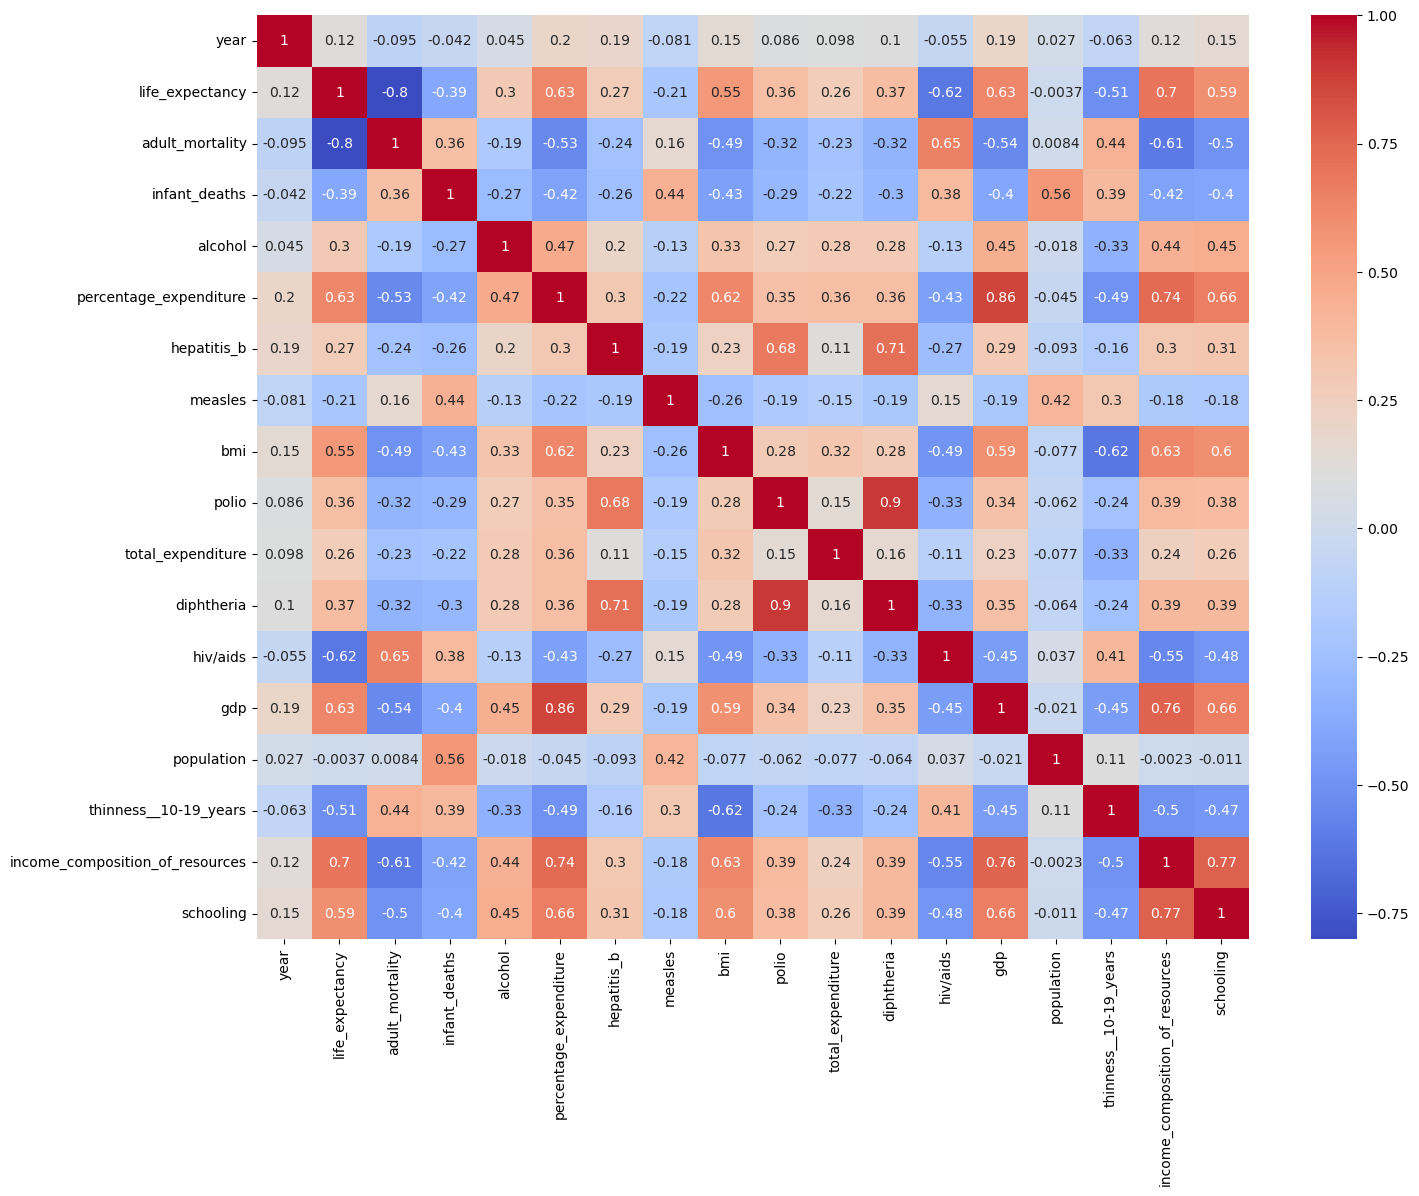

In [38]:
features = data.select_dtypes(exclude='object')
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(data[list(features.columns)].corr(method='kendall'), cmap = 'coolwarm', annot = True, ax=ax)

Теперь можно ответить на поставленные вопросы.   
Действительно ли различные прогнозирующие факторы, которые были выбраны изначально, влияют на ожидаемую продолжительность жизни? Какие прогнозирующие переменные на самом деле влияют на ожидаемую продолжительность жизни?   
Здравый смысл подсказывает, что некоторые признаки зависят от доходов, а значит возможна ложная корреляция. За доходы отвечают ВВП и индекс структуры доходов от ресурсов. Убедимся, что они связаны.    

<Axes: xlabel='gdp'>

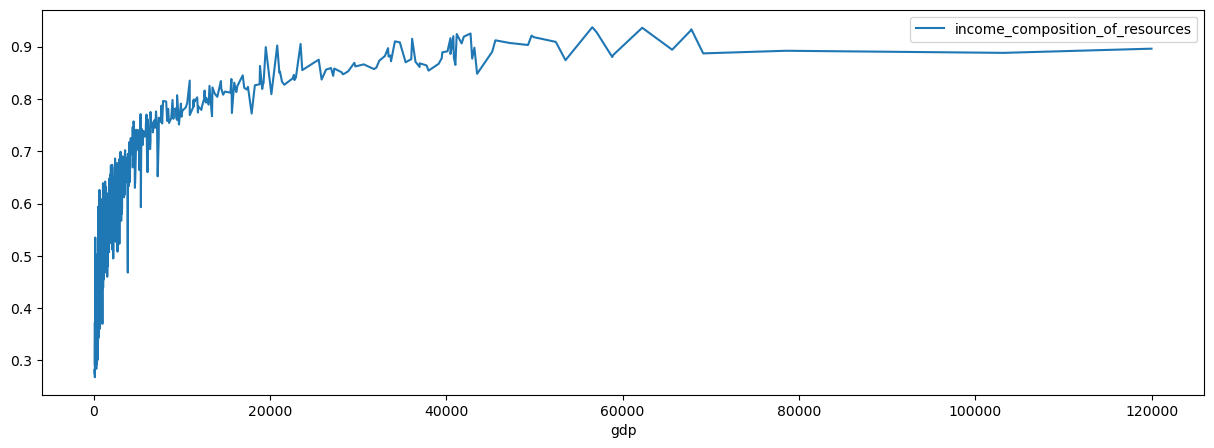

In [40]:
df = data.groupby('income_composition_of_resources')['gdp'].mean().reset_index().sort_values('gdp')
df.plot(x='gdp', y='income_composition_of_resources', figsize=(15,5))

Индекс больше коррелирует с другими признаками, поэтому будем делать выборку по нему. Чтобы исключить влияние ложной корреляции, возьмем близкие к медиане индексы.

In [44]:
data['income_composition_of_resources'].median()

0.6715

(577, 2)


<Axes: >

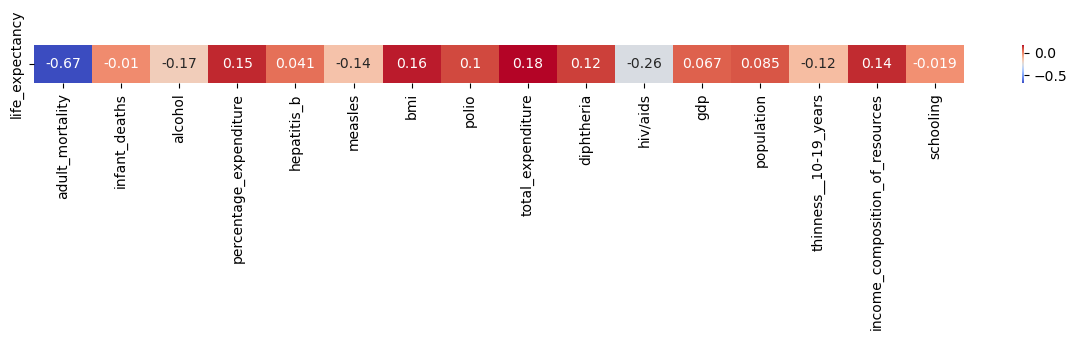

In [45]:
data_median = data[(data['income_composition_of_resources'] > 0.65) & (data['income_composition_of_resources'] < 0.7)]
print(df.shape)

features = data.select_dtypes(exclude='object')
df1 = data_median[list(features.columns)].corr(method='kendall')
fig, ax = plt.subplots(figsize=(15,0.5))
sns.heatmap(df1.iloc[1:2].drop(['year', 'life_expectancy'], axis=1), cmap = 'coolwarm', annot = True, ax=ax)

Осталась заметная корреляция со взрослой смертностью и ВИЧ/СПИД. Посмотрим на графики.

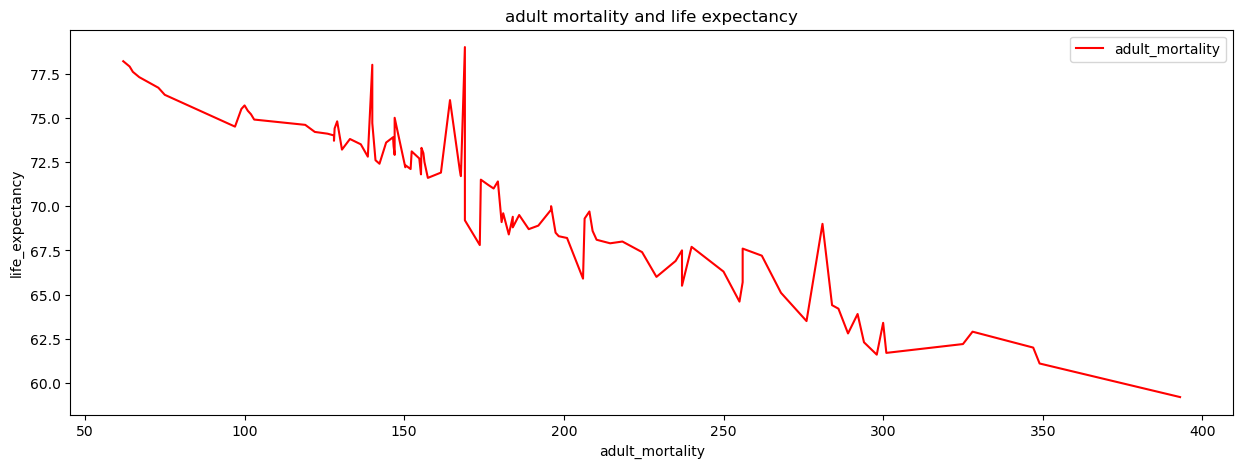

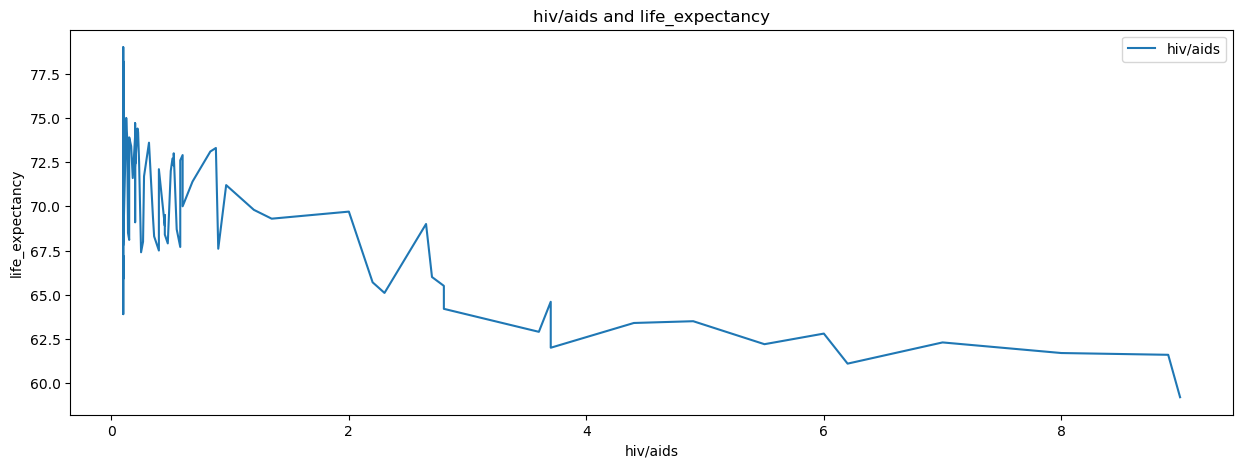

In [47]:
df1 = data_median.groupby('life_expectancy')['adult_mortality'].mean().reset_index().sort_values('adult_mortality')
df1.plot(x='adult_mortality', y='life_expectancy', figsize=(15,5), color='r', label='adult_mortality')
plt.xlabel("adult_mortality")
plt.ylabel("life_expectancy")
plt.title("adult mortality and life expectancy")

df2 = data_median.groupby('life_expectancy')['hiv/aids'].mean().reset_index().sort_values('hiv/aids')
df2.plot(x='hiv/aids', y='life_expectancy', figsize=(15,5), label='hiv/aids')

plt.xlabel("hiv/aids")
plt.ylabel("life_expectancy")
plt.title("hiv/aids and life_expectancy")

plt.legend()
plt.show()

Можно сказать, что на продолжительность жизни влияют взрослая смертность, ВИЧ/СПИД и, конечно, финансовое состояние страны.  

Должна ли страна с более низким значением ожидаемой продолжительности жизни (<65 лет) увеличить расходы на здравоохранение, чтобы улучшить свою среднюю продолжительность жизни?   
Построим график зависимости двух признаков по всем данным.

Text(0.5, 1.0, 'percentage expenditure and life expectancy')

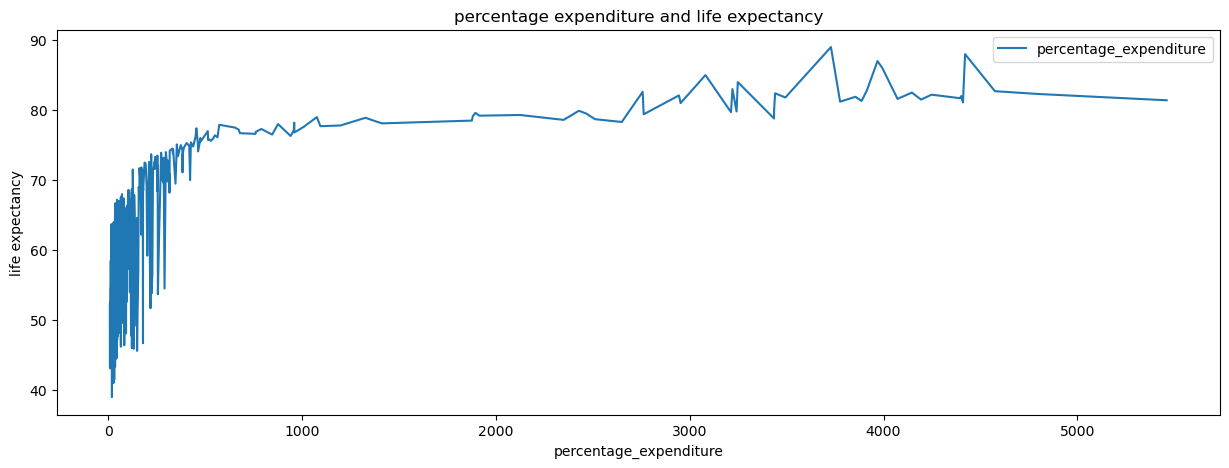

In [49]:
df1 = data.groupby('life_expectancy')['percentage_expenditure'].mean().reset_index().sort_values('percentage_expenditure')
df1.plot(x='percentage_expenditure', y='life_expectancy', figsize=(15,5), label='percentage_expenditure')
plt.ylabel("life expectancy")
plt.title("percentage expenditure and life expectancy")

На графике хорошо видно, что страны с продрожительностью жизни меньше 65 лет имеют низкие расходы на здравоохранение. Увеличение расходов увеличило бы продолжительность жизни, но только до определенного значения. Расходы больше 500 сильного прироста к продолжительности жизни не дают.  

Как уровень младенческой и взрослой смертности влияет на продолжительность жизни?   
Построим аналогичные графики для взрослой и младенческой сметрностей по выборке.

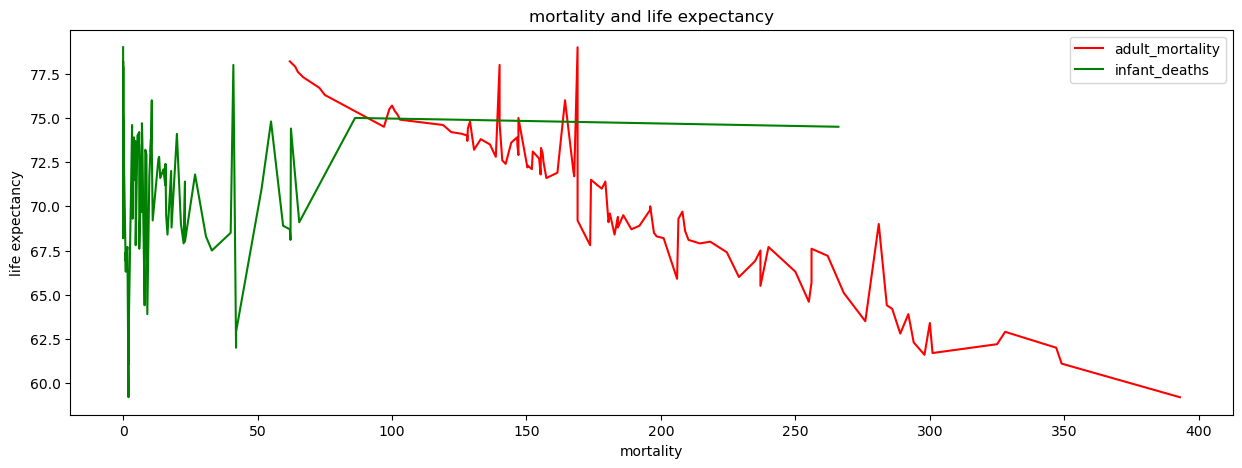

In [51]:
plt.subplots(figsize=(15,5))

df1 = data_median.groupby('life_expectancy')['adult_mortality'].mean().reset_index().sort_values('adult_mortality')
df2 = data_median.groupby('life_expectancy')['infant_deaths'].mean().reset_index().sort_values('infant_deaths')

plt.plot(df1['adult_mortality'], df1['life_expectancy'], color='r', label='adult_mortality')
plt.plot(df2['infant_deaths'], df2['life_expectancy'], color='g', label='infant_deaths')

plt.xlabel("mortality")
plt.ylabel("life expectancy")
plt.title("mortality and life expectancy")

plt.legend()

plt.show()

Очевидно, что взрослая смертность имеет большое влияние на продолжительность жизни. Младенческая смертность влияния не оказывает.   

Положительно или отрицательно связана продолжительность жизни с привычками питания, образом жизни, физическими упражнениями, курением, употреблением алкоголя и т.д. Как влияет школьное образование на продолжительность жизни людей?    
Насчет курения и физических упражнений ничего сказать невозможно, поскольку таких данных нет. Посмотрим на потребление алкоголя, худобу, избыточный вес и образование. Выше было видно, что при похожих индексах доходов сильной корреляции этих признаков с продолжительностью жизни нет. Посмотрим на графики по выборке.

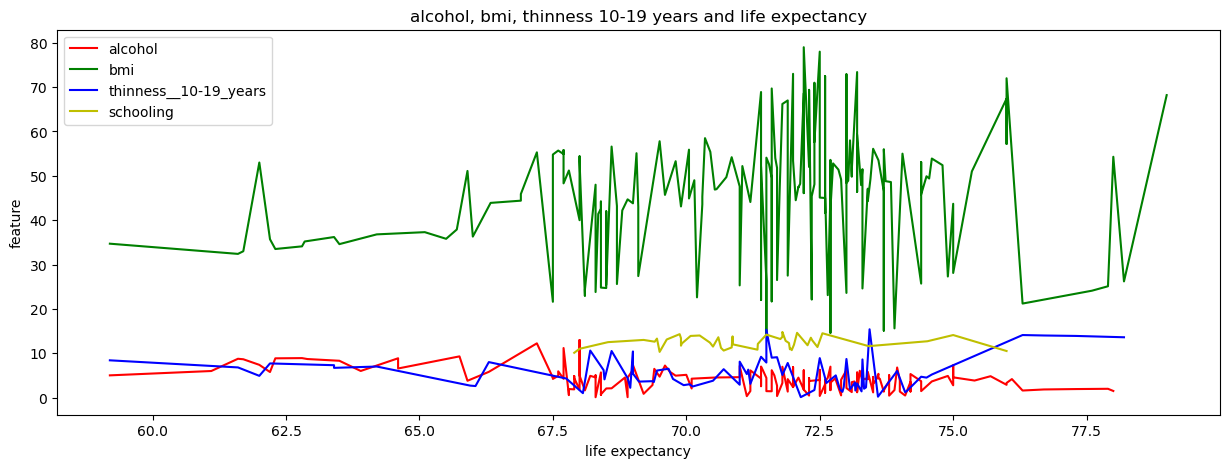

In [58]:
plt.subplots(figsize=(15,5))

df1 = data_median.groupby('alcohol')['life_expectancy'].mean().reset_index().sort_values('life_expectancy')
df2 = data_median.groupby('bmi')['life_expectancy'].mean().reset_index().sort_values('life_expectancy')
df3 = data_median.groupby('thinness__10-19_years')['life_expectancy'].mean().reset_index().sort_values('life_expectancy')
df4 = data_median.groupby('schooling')['life_expectancy'].mean().reset_index().sort_values('life_expectancy')

plt.plot(df1['life_expectancy'], df1['alcohol'], color='r', label='alcohol')
plt.plot(df2['life_expectancy'], df2['bmi'], color='g', label='bmi')
plt.plot(df3['life_expectancy'], df3['thinness__10-19_years'], color='b', label='thinness__10-19_years')
plt.plot(df4['life_expectancy'], df4['schooling'], color='y', label='schooling')

plt.xlabel("life expectancy")
plt.ylabel("feature")
plt.title("alcohol, bmi, thinness 10-19 years and life expectancy")

plt.legend()

plt.show()

Действительно, алкоголь, худоба, избыточный вес и образование значимого влияния на продолжительность жизни не оказывают.   

В густонаселенных странах ожидаемая продолжительность жизни, как правило, ниже?   
Посмотрим на график по всем данным.

Text(0.5, 1.0, 'population and life expectancy')

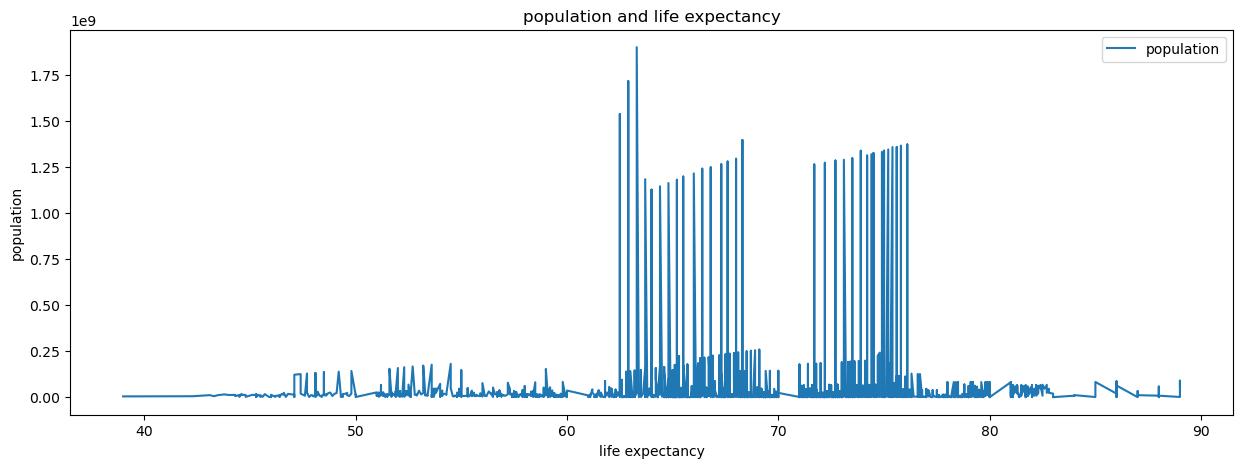

In [70]:
df1 = data.groupby('population')['life_expectancy'].mean().reset_index().sort_values('life_expectancy')
df1.plot(x='life_expectancy', y='population', figsize=(15,5))
plt.xlabel("life expectancy")
plt.ylabel("population")
plt.title("population and life expectancy")

Численность населения на продолжительность жизни не влияет.   

Как влияет охват иммунизацией на ожидаемую продолжительность жизни?   
Посмотрим на графики по выборке.

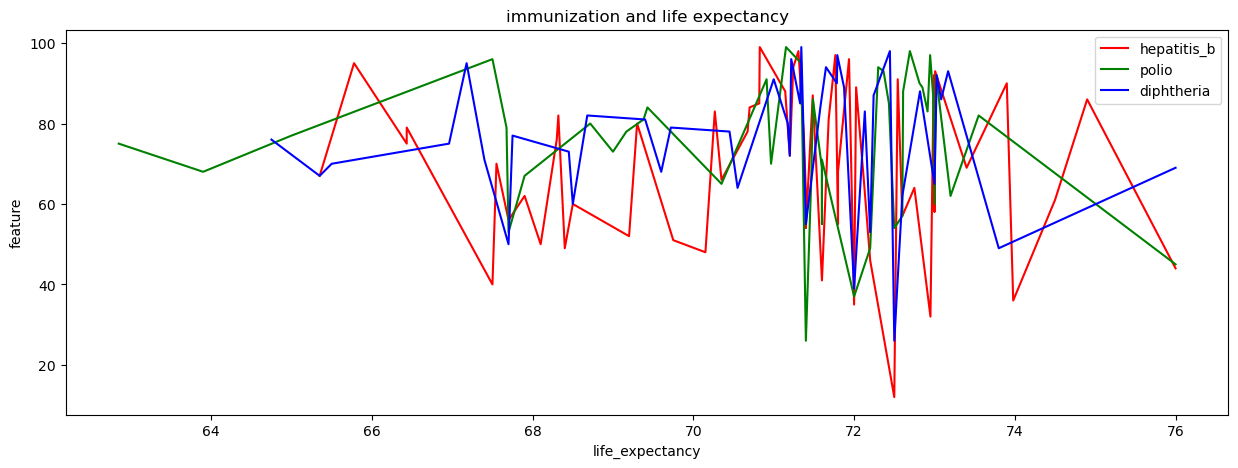

In [73]:
plt.subplots(figsize=(15,5))

df1 = data_median.groupby('hepatitis_b')['life_expectancy'].mean().reset_index().sort_values('life_expectancy')
df2 = data_median.groupby('polio')['life_expectancy'].mean().reset_index().sort_values('life_expectancy')
df3 = data_median.groupby('diphtheria')['life_expectancy'].mean().reset_index().sort_values('life_expectancy')

plt.plot(df1['life_expectancy'], df1['hepatitis_b'], color='r', label='hepatitis_b')
plt.plot(df2['life_expectancy'], df2['polio'], color='g', label='polio')
plt.plot(df3['life_expectancy'], df3['diphtheria'], color='b', label='diphtheria')

plt.xlabel("life_expectancy")
plt.ylabel("feature")
plt.title("immunization and life expectancy")

plt.legend()
plt.show()

Также видим, что иммунизация значимого влияния на продолжительность жизни не оказывает.